In [27]:
%store -r __ipy
%store -r __da
%store -r __ml

In [28]:
__ipy

Helper ipython script loaded


In [29]:
__da

Basic Data Analysis tools was loaded


In [30]:
__ml

In [31]:
import gc
gc.collect()

172

In [32]:
train_df = pd.read_pickle(root + "train_features.pkl")
full_train_df = train_df.drop('timestamp', axis=1)
full_train_df = full_train_df.reset_index(drop=True)
target = full_train_df['meter_reading']

In [33]:
test_df = pd.read_pickle(root + "test_features.pkl")
test_df.drop('timestamp', axis=1, inplace=True)

In [38]:
import gc
import joblib

@telegram_sender(token=TELEGRAM_API_KEY, chat_id=CHAT_ID)
def lgbm_cross_validation(params):
    seed = 42
    folds = 4
    kf = GroupKFold(n_splits=4)
    total_loss = []
    models = []
    
    for train_index, val_index in kf.split(full_train_df, groups=full_train_df['group']):
        
        train_X = full_train_df.loc[val_index, feat_cols].reset_index(drop=True)
        train_y = target.iloc[val_index]
        
        lgb_train = lgb.Dataset(train_X, train_y, categorical_feature=categoricals)
        lgbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=1000,
                    valid_sets=(lgb_train),
                    early_stopping_rounds=300)
        
        models.append(lgbm)
        gc.collect()

    return models

In [40]:
import joblib
params = {
            'boosting_type': 'gbdt',
            'objective': 'regression',
            'metric': {'rmse'},
            'subsample': 0.4,
            'learning_rate': 0.15,
            'num_leaves': 40,
            'feature_fraction': 0.4,
            'lambda_l1': 1,  
            'lambda_l2': 1
            }

all_models = lgbm_cross_validation(params)

for i, model in enumerate(all_models):
    joblib.dump(model, filename= models + f"lgbm_seasoned{i}.pkl")

[1]	training's rmse: 2187.8
Training until validation scores don't improve for 300 rounds
[2]	training's rmse: 1912.95
[3]	training's rmse: 1681.6
[4]	training's rmse: 1492.43
[5]	training's rmse: 1324.21
[6]	training's rmse: 1182.04
[7]	training's rmse: 1117.6
[8]	training's rmse: 1026.58
[9]	training's rmse: 1000.72
[10]	training's rmse: 994.672
[11]	training's rmse: 981.029
[12]	training's rmse: 873.046
[13]	training's rmse: 793.34
[14]	training's rmse: 739.613
[15]	training's rmse: 732.32
[16]	training's rmse: 731.453
[17]	training's rmse: 724.807
[18]	training's rmse: 683.707
[19]	training's rmse: 678.673
[20]	training's rmse: 630.546
[21]	training's rmse: 625.518
[22]	training's rmse: 606.574
[23]	training's rmse: 604.043
[24]	training's rmse: 570.952
[25]	training's rmse: 569.629
[26]	training's rmse: 535.813
[27]	training's rmse: 535.647
[28]	training's rmse: 534.532
[29]	training's rmse: 519.103
[30]	training's rmse: 504.407
[31]	training's rmse: 491.684
[32]	training's rmse: 

[267]	training's rmse: 272.424
[268]	training's rmse: 271.302
[269]	training's rmse: 270.471
[270]	training's rmse: 270.341
[271]	training's rmse: 269.22
[272]	training's rmse: 269.153
[273]	training's rmse: 268.206
[274]	training's rmse: 267.614
[275]	training's rmse: 267.398
[276]	training's rmse: 267.285
[277]	training's rmse: 267.232
[278]	training's rmse: 267.009
[279]	training's rmse: 266.364
[280]	training's rmse: 266.301
[281]	training's rmse: 265.592
[282]	training's rmse: 265.282
[283]	training's rmse: 265.218
[284]	training's rmse: 265.185
[285]	training's rmse: 264.938
[286]	training's rmse: 264.908
[287]	training's rmse: 264.898
[288]	training's rmse: 264.868
[289]	training's rmse: 264.18
[290]	training's rmse: 264.129
[291]	training's rmse: 263.642
[292]	training's rmse: 263.626
[293]	training's rmse: 263.608
[294]	training's rmse: 263.464
[295]	training's rmse: 263.094
[296]	training's rmse: 263.029
[297]	training's rmse: 262.961
[298]	training's rmse: 262.935
[299]	trai

[532]	training's rmse: 217.059
[533]	training's rmse: 217.02
[534]	training's rmse: 216.971
[535]	training's rmse: 216.966
[536]	training's rmse: 216.95
[537]	training's rmse: 216.943
[538]	training's rmse: 216.923
[539]	training's rmse: 216.907
[540]	training's rmse: 216.873
[541]	training's rmse: 216.521
[542]	training's rmse: 216.505
[543]	training's rmse: 216.282
[544]	training's rmse: 216.28
[545]	training's rmse: 216.238
[546]	training's rmse: 216.133
[547]	training's rmse: 216.115
[548]	training's rmse: 215.995
[549]	training's rmse: 215.899
[550]	training's rmse: 215.889
[551]	training's rmse: 215.865
[552]	training's rmse: 215.721
[553]	training's rmse: 215.268
[554]	training's rmse: 215.219
[555]	training's rmse: 215.167
[556]	training's rmse: 215.047
[557]	training's rmse: 214.726
[558]	training's rmse: 214.469
[559]	training's rmse: 214.169
[560]	training's rmse: 214.129
[561]	training's rmse: 214.076
[562]	training's rmse: 213.099
[563]	training's rmse: 212.695
[564]	train

[797]	training's rmse: 187.279
[798]	training's rmse: 187.272
[799]	training's rmse: 187.154
[800]	training's rmse: 187.144
[801]	training's rmse: 186.884
[802]	training's rmse: 186.847
[803]	training's rmse: 186.812
[804]	training's rmse: 186.7
[805]	training's rmse: 186.695
[806]	training's rmse: 186.692
[807]	training's rmse: 186.653
[808]	training's rmse: 186.646
[809]	training's rmse: 186.616
[810]	training's rmse: 186.61
[811]	training's rmse: 186.567
[812]	training's rmse: 186.393
[813]	training's rmse: 186.387
[814]	training's rmse: 186.298
[815]	training's rmse: 185.894
[816]	training's rmse: 185.878
[817]	training's rmse: 185.874
[818]	training's rmse: 185.852
[819]	training's rmse: 185.806
[820]	training's rmse: 185.75
[821]	training's rmse: 185.646
[822]	training's rmse: 185.624
[823]	training's rmse: 185.321
[824]	training's rmse: 185.291
[825]	training's rmse: 185.141
[826]	training's rmse: 185.136
[827]	training's rmse: 184.991
[828]	training's rmse: 184.96
[829]	trainin

[60]	training's rmse: 875.043
[61]	training's rmse: 873.331
[62]	training's rmse: 864.459
[63]	training's rmse: 862.172
[64]	training's rmse: 855.946
[65]	training's rmse: 854.995
[66]	training's rmse: 843.666
[67]	training's rmse: 833.951
[68]	training's rmse: 827.888
[69]	training's rmse: 827.848
[70]	training's rmse: 821.9
[71]	training's rmse: 817.648
[72]	training's rmse: 812.138
[73]	training's rmse: 805.998
[74]	training's rmse: 803.56
[75]	training's rmse: 803.54
[76]	training's rmse: 799.588
[77]	training's rmse: 796.381
[78]	training's rmse: 795.894
[79]	training's rmse: 792.005
[80]	training's rmse: 787.509
[81]	training's rmse: 786.625
[82]	training's rmse: 784.503
[83]	training's rmse: 778.642
[84]	training's rmse: 776.357
[85]	training's rmse: 774.579
[86]	training's rmse: 770.93
[87]	training's rmse: 769.37
[88]	training's rmse: 768.014
[89]	training's rmse: 767.338
[90]	training's rmse: 763.404
[91]	training's rmse: 758.854
[92]	training's rmse: 758.097
[93]	training's 

[326]	training's rmse: 563.111
[327]	training's rmse: 562.753
[328]	training's rmse: 562.37
[329]	training's rmse: 561.676
[330]	training's rmse: 561.643
[331]	training's rmse: 560.055
[332]	training's rmse: 559.801
[333]	training's rmse: 559.779
[334]	training's rmse: 559.423
[335]	training's rmse: 559.222
[336]	training's rmse: 559.204
[337]	training's rmse: 559.199
[338]	training's rmse: 559.022
[339]	training's rmse: 558.994
[340]	training's rmse: 558.384
[341]	training's rmse: 558.291
[342]	training's rmse: 558.065
[343]	training's rmse: 557.622
[344]	training's rmse: 557.599
[345]	training's rmse: 557.539
[346]	training's rmse: 557.41
[347]	training's rmse: 555.226
[348]	training's rmse: 555.192
[349]	training's rmse: 555.18
[350]	training's rmse: 554.564
[351]	training's rmse: 552.458
[352]	training's rmse: 550.488
[353]	training's rmse: 549.012
[354]	training's rmse: 548.67
[355]	training's rmse: 548.544
[356]	training's rmse: 548.416
[357]	training's rmse: 548.099
[358]	traini

[591]	training's rmse: 455.14
[592]	training's rmse: 454.626
[593]	training's rmse: 454.507
[594]	training's rmse: 453.183
[595]	training's rmse: 453.178
[596]	training's rmse: 453.126
[597]	training's rmse: 452.923
[598]	training's rmse: 452.745
[599]	training's rmse: 452.572
[600]	training's rmse: 452.558
[601]	training's rmse: 452.366
[602]	training's rmse: 452.36
[603]	training's rmse: 452.35
[604]	training's rmse: 452.163
[605]	training's rmse: 451.849
[606]	training's rmse: 451.763
[607]	training's rmse: 451.649
[608]	training's rmse: 451.625
[609]	training's rmse: 451.587
[610]	training's rmse: 451.276
[611]	training's rmse: 451.139
[612]	training's rmse: 450.908
[613]	training's rmse: 450.904
[614]	training's rmse: 449.219
[615]	training's rmse: 449.099
[616]	training's rmse: 449.083
[617]	training's rmse: 449.068
[618]	training's rmse: 448.818
[619]	training's rmse: 448.566
[620]	training's rmse: 448.513
[621]	training's rmse: 447.926
[622]	training's rmse: 447.867
[623]	train

[856]	training's rmse: 394.28
[857]	training's rmse: 394.195
[858]	training's rmse: 393.821
[859]	training's rmse: 393.274
[860]	training's rmse: 393.262
[861]	training's rmse: 393.11
[862]	training's rmse: 392.651
[863]	training's rmse: 392.647
[864]	training's rmse: 392.451
[865]	training's rmse: 391.21
[866]	training's rmse: 391.199
[867]	training's rmse: 389.396
[868]	training's rmse: 389.373
[869]	training's rmse: 388.946
[870]	training's rmse: 388.554
[871]	training's rmse: 388.549
[872]	training's rmse: 388.545
[873]	training's rmse: 387.484
[874]	training's rmse: 387.119
[875]	training's rmse: 386.545
[876]	training's rmse: 386.217
[877]	training's rmse: 385.595
[878]	training's rmse: 385.4
[879]	training's rmse: 385.241
[880]	training's rmse: 385.236
[881]	training's rmse: 383.321
[882]	training's rmse: 383.314
[883]	training's rmse: 383.27
[884]	training's rmse: 383.263
[885]	training's rmse: 383.249
[886]	training's rmse: 382.973
[887]	training's rmse: 382.949
[888]	training

[120]	training's rmse: 231.881
[121]	training's rmse: 231.7
[122]	training's rmse: 230.597
[123]	training's rmse: 230.541
[124]	training's rmse: 230.315
[125]	training's rmse: 229.815
[126]	training's rmse: 229.735
[127]	training's rmse: 229.656
[128]	training's rmse: 228.812
[129]	training's rmse: 227.792
[130]	training's rmse: 227.314
[131]	training's rmse: 227.273
[132]	training's rmse: 227.104
[133]	training's rmse: 226.594
[134]	training's rmse: 226.245
[135]	training's rmse: 225.771
[136]	training's rmse: 225.233
[137]	training's rmse: 224.601
[138]	training's rmse: 224.147
[139]	training's rmse: 224.061
[140]	training's rmse: 223.97
[141]	training's rmse: 223.452
[142]	training's rmse: 222.974
[143]	training's rmse: 222.898
[144]	training's rmse: 222.059
[145]	training's rmse: 221.606
[146]	training's rmse: 221.396
[147]	training's rmse: 221.273
[148]	training's rmse: 221.227
[149]	training's rmse: 221.118
[150]	training's rmse: 220.568
[151]	training's rmse: 220.386
[152]	train

[385]	training's rmse: 170.134
[386]	training's rmse: 170.077
[387]	training's rmse: 170.048
[388]	training's rmse: 169.997
[389]	training's rmse: 169.58
[390]	training's rmse: 169.563
[391]	training's rmse: 169.543
[392]	training's rmse: 168.493
[393]	training's rmse: 168.446
[394]	training's rmse: 168.2
[395]	training's rmse: 168.066
[396]	training's rmse: 168.006
[397]	training's rmse: 167.829
[398]	training's rmse: 167.737
[399]	training's rmse: 167.484
[400]	training's rmse: 167.456
[401]	training's rmse: 167.249
[402]	training's rmse: 166.846
[403]	training's rmse: 166.702
[404]	training's rmse: 166.456
[405]	training's rmse: 166.218
[406]	training's rmse: 166.164
[407]	training's rmse: 165.786
[408]	training's rmse: 165.769
[409]	training's rmse: 165.574
[410]	training's rmse: 165.53
[411]	training's rmse: 165.365
[412]	training's rmse: 165.314
[413]	training's rmse: 165.286
[414]	training's rmse: 165.119
[415]	training's rmse: 164.624
[416]	training's rmse: 164.4
[417]	training

[650]	training's rmse: 139.835
[651]	training's rmse: 139.822
[652]	training's rmse: 139.818
[653]	training's rmse: 139.798
[654]	training's rmse: 139.716
[655]	training's rmse: 139.709
[656]	training's rmse: 139.616
[657]	training's rmse: 139.605
[658]	training's rmse: 139.483
[659]	training's rmse: 139.385
[660]	training's rmse: 139.37
[661]	training's rmse: 139.271
[662]	training's rmse: 139.062
[663]	training's rmse: 139.034
[664]	training's rmse: 138.934
[665]	training's rmse: 138.844
[666]	training's rmse: 138.821
[667]	training's rmse: 138.8
[668]	training's rmse: 138.754
[669]	training's rmse: 138.504
[670]	training's rmse: 138.496
[671]	training's rmse: 138.384
[672]	training's rmse: 138.28
[673]	training's rmse: 138.201
[674]	training's rmse: 138.177
[675]	training's rmse: 138.14
[676]	training's rmse: 138.126
[677]	training's rmse: 138.123
[678]	training's rmse: 138.011
[679]	training's rmse: 137.942
[680]	training's rmse: 137.671
[681]	training's rmse: 137.611
[682]	trainin

[914]	training's rmse: 123.841
[915]	training's rmse: 123.813
[916]	training's rmse: 123.811
[917]	training's rmse: 123.798
[918]	training's rmse: 123.752
[919]	training's rmse: 123.744
[920]	training's rmse: 123.711
[921]	training's rmse: 123.682
[922]	training's rmse: 123.647
[923]	training's rmse: 123.526
[924]	training's rmse: 123.493
[925]	training's rmse: 123.485
[926]	training's rmse: 123.48
[927]	training's rmse: 123.289
[928]	training's rmse: 123.246
[929]	training's rmse: 123.23
[930]	training's rmse: 123.163
[931]	training's rmse: 123.113
[932]	training's rmse: 123.104
[933]	training's rmse: 123.096
[934]	training's rmse: 122.926
[935]	training's rmse: 122.914
[936]	training's rmse: 122.909
[937]	training's rmse: 122.907
[938]	training's rmse: 122.838
[939]	training's rmse: 122.833
[940]	training's rmse: 122.832
[941]	training's rmse: 122.829
[942]	training's rmse: 122.819
[943]	training's rmse: 122.812
[944]	training's rmse: 122.786
[945]	training's rmse: 122.775
[946]	trai

[177]	training's rmse: 232.234
[178]	training's rmse: 231.944
[179]	training's rmse: 231.882
[180]	training's rmse: 231.761
[181]	training's rmse: 231.744
[182]	training's rmse: 231.479
[183]	training's rmse: 230.88
[184]	training's rmse: 230.797
[185]	training's rmse: 230.353
[186]	training's rmse: 230.016
[187]	training's rmse: 229.6
[188]	training's rmse: 229.341
[189]	training's rmse: 228.704
[190]	training's rmse: 228.683
[191]	training's rmse: 228.621
[192]	training's rmse: 228.391
[193]	training's rmse: 227.996
[194]	training's rmse: 227.589
[195]	training's rmse: 227.132
[196]	training's rmse: 226.692
[197]	training's rmse: 226.673
[198]	training's rmse: 226.538
[199]	training's rmse: 225.987
[200]	training's rmse: 225.645
[201]	training's rmse: 224.902
[202]	training's rmse: 224.702
[203]	training's rmse: 224.276
[204]	training's rmse: 224.265
[205]	training's rmse: 224.094
[206]	training's rmse: 223.898
[207]	training's rmse: 223.838
[208]	training's rmse: 223.753
[209]	train

[442]	training's rmse: 179.06
[443]	training's rmse: 178.873
[444]	training's rmse: 178.86
[445]	training's rmse: 178.826
[446]	training's rmse: 178.669
[447]	training's rmse: 178.661
[448]	training's rmse: 178.463
[449]	training's rmse: 178.453
[450]	training's rmse: 178.403
[451]	training's rmse: 178.379
[452]	training's rmse: 178.272
[453]	training's rmse: 178.202
[454]	training's rmse: 177.9
[455]	training's rmse: 177.768
[456]	training's rmse: 177.61
[457]	training's rmse: 177.511
[458]	training's rmse: 177.401
[459]	training's rmse: 176.645
[460]	training's rmse: 176.616
[461]	training's rmse: 176.594
[462]	training's rmse: 176.23
[463]	training's rmse: 175.947
[464]	training's rmse: 175.716
[465]	training's rmse: 175.259
[466]	training's rmse: 174.572
[467]	training's rmse: 174.491
[468]	training's rmse: 174.467
[469]	training's rmse: 174.395
[470]	training's rmse: 174.37
[471]	training's rmse: 174.364
[472]	training's rmse: 174.168
[473]	training's rmse: 174.14
[474]	training's

[707]	training's rmse: 149.518
[708]	training's rmse: 149.515
[709]	training's rmse: 149.311
[710]	training's rmse: 149.189
[711]	training's rmse: 149.084
[712]	training's rmse: 149.026
[713]	training's rmse: 148.888
[714]	training's rmse: 148.716
[715]	training's rmse: 148.594
[716]	training's rmse: 148.486
[717]	training's rmse: 148.478
[718]	training's rmse: 148.427
[719]	training's rmse: 148.409
[720]	training's rmse: 148.397
[721]	training's rmse: 148.294
[722]	training's rmse: 148.259
[723]	training's rmse: 148.249
[724]	training's rmse: 148.227
[725]	training's rmse: 148.147
[726]	training's rmse: 148.082
[727]	training's rmse: 148.065
[728]	training's rmse: 148.041
[729]	training's rmse: 148.012
[730]	training's rmse: 148.002
[731]	training's rmse: 147.805
[732]	training's rmse: 147.691
[733]	training's rmse: 147.622
[734]	training's rmse: 147.589
[735]	training's rmse: 147.497
[736]	training's rmse: 147.466
[737]	training's rmse: 147.453
[738]	training's rmse: 147.409
[739]	tr

[972]	training's rmse: 134.473
[973]	training's rmse: 134.463
[974]	training's rmse: 134.452
[975]	training's rmse: 134.451
[976]	training's rmse: 134.441
[977]	training's rmse: 134.298
[978]	training's rmse: 134.293
[979]	training's rmse: 134.234
[980]	training's rmse: 134.218
[981]	training's rmse: 134.182
[982]	training's rmse: 134.18
[983]	training's rmse: 134.093
[984]	training's rmse: 134.074
[985]	training's rmse: 134.067
[986]	training's rmse: 134.057
[987]	training's rmse: 134.044
[988]	training's rmse: 133.998
[989]	training's rmse: 133.962
[990]	training's rmse: 133.863
[991]	training's rmse: 133.808
[992]	training's rmse: 133.803
[993]	training's rmse: 133.761
[994]	training's rmse: 133.756
[995]	training's rmse: 133.752
[996]	training's rmse: 133.746
[997]	training's rmse: 133.715
[998]	training's rmse: 133.638
[999]	training's rmse: 133.443
[1000]	training's rmse: 133.082
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 133.082


In [6]:
all_models = [joblib.load(models + f"lgbm_seasoned{i}.pkl") for i in range(4)]

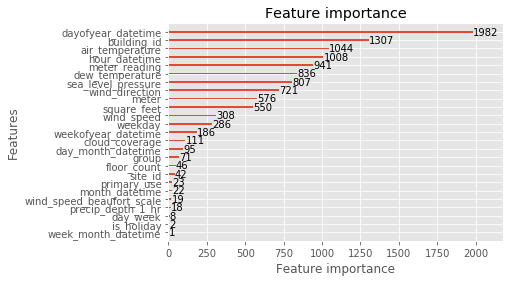

In [26]:
import lightgbm as lgb
lgb.plot_importance(all_models[0]) 

In [10]:
from tqdm.auto import tqdm 
def batch_prediction(model, samples, n = 1000):
    kfold = KFold(n)
    agg = []
    
    for train_index, test_index in tqdm(kfold.split(samples)):
        preds = model.predict(samples.loc[test_index, :])
        agg += preds.tolist()
        
    return np.array(agg)

s = [batch_prediction(model, test_df) for model in all_models]

In [11]:
predictions = s

In [21]:
s

[array([ 1.38347877,  1.38347877,  1.38347877, ..., 14.85050403,
        14.85050403, 14.85050403]),
 array([ 0.23080077,  0.84508511,  0.93099724, ..., 14.62312247,
        14.62312247, 14.62312247]),
 array([136.52118244, 136.52118244, 136.52118244, ..., 136.52118244,
        136.52118244, 136.52118244]),
 array([ 0.57431354,  0.58520759,  0.57431354, ..., 14.37574407,
        14.37574407, 14.37574407])]

In [12]:
predictions = np.array(predictions)

In [11]:
clips = np.clip(predictions, a_min=0, a_max=None)
                
#predictions_mean = np.mean(clips, a_min=0, a_max=None), axis=1)

AttributeError: module 'numpy' has no attribute 'np'

In [ ]:
prediction_means = np.mean(clips.T, axis=1)

In [33]:
sample_submission = pd.read_csv(root + 'sample_submission.csv')
sample_submission['meter_reading'] = prediction_means
sample_submission.to_csv('submission.csv', index=False)

In [12]:
result = []
predictions['target'] = np.mean(predictions[[col for col in predictions.columns if col not in ['building_id']]].values, axis=1)
for i in range(4) models[i].predict(test_df.query(f"group == {i+1}"))


SyntaxError: invalid syntax (<ipython-input-12-e441bac1525d>, line 3)

In [ ]:
sample_submission = pd.read_csv( root + 'sample_submission.csv')

predictions['target'] = np.mean(predictions[[col for col in predictions.columns if col not in ['building_id']]].values, axis=1)
sample_submission['meter_reading'] = np.clip(predictions['target'].values, a_min=0, a_max=None)
sample_submission.to_csv('submission.csv', index=False)

In [ ]:
sample_submission = pd.read_csv( root + 'sample_submission.csv')

In [ ]:
sample_submission.shape

In [ ]:
test_df.shape